In [1]:
import os
file_list = os.listdir(r"C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\data") #  download한 데이터를 한 곳에 모아준 폴더
print(len(file_list))
print(file_list)

8731
['100263-2-0-117.wav', '100263-2-0-121.wav', '100263-2-0-126.wav', '100263-2-0-137.wav', '100263-2-0-143.wav', '100263-2-0-161.wav', '100263-2-0-3.wav', '100263-2-0-36.wav', '100648-1-0-0.wav', '100648-1-1-0.wav', '100648-1-2-0.wav', '100648-1-3-0.wav', '100648-1-4-0.wav', '100652-3-0-0.wav', '100652-3-0-1.wav', '100652-3-0-2.wav', '100652-3-0-3.wav', '100795-3-0-0.wav', '100795-3-1-0.wav', '100795-3-1-1.wav', '100795-3-1-2.wav', '100852-0-0-0.wav', '100852-0-0-1.wav', '100852-0-0-10.wav', '100852-0-0-11.wav', '100852-0-0-12.wav', '100852-0-0-13.wav', '100852-0-0-14.wav', '100852-0-0-15.wav', '100852-0-0-16.wav', '100852-0-0-17.wav', '100852-0-0-18.wav', '100852-0-0-19.wav', '100852-0-0-2.wav', '100852-0-0-20.wav', '100852-0-0-21.wav', '100852-0-0-22.wav', '100852-0-0-23.wav', '100852-0-0-24.wav', '100852-0-0-25.wav', '100852-0-0-26.wav', '100852-0-0-27.wav', '100852-0-0-28.wav', '100852-0-0-29.wav', '100852-0-0-3.wav', '100852-0-0-30.wav', '100852-0-0-4.wav', '100852-0-0-5.wav', 

In [2]:
from sklearn.model_selection import train_test_split

train_wav_list, test_wav_list = train_test_split(file_list, test_size=0.2, random_state=42)

print(len(train_wav_list), len(test_wav_list))

6984 1747


In [3]:
with open('../train.txt', 'w') as f:
    f.write('\n'.join(train_wav_list) + '\n')
    f.close()

with open('../test.txt', 'w') as f:
    f.write('\n'.join(test_wav_list) + '\n')
    f.close()

In [4]:
train_wav_list

['83680-5-0-3.wav',
 '34952-8-0-6.wav',
 '148841-6-1-0.wav',
 '24728-7-0-0.wav',
 '159742-8-0-14.wav',
 '60591-2-0-11.wav',
 '104625-4-0-48.wav',
 '100852-0-0-18.wav',
 '162540-1-1-0.wav',
 '177726-0-0-2.wav',
 '178686-0-0-18.wav',
 '167464-0-0-8.wav',
 '54067-2-0-33.wav',
 '102871-8-0-8.wav',
 '165166-8-0-7.wav',
 '165640-4-0-2.wav',
 '90013-7-1-0.wav',
 '203929-7-2-3.wav',
 '66622-4-0-4.wav',
 '99192-4-0-43.wav',
 '180937-7-3-14.wav',
 '162435-6-0-0.wav',
 '7389-1-4-0.wav',
 '174293-6-2-0.wav',
 '115415-9-0-6.wav',
 '70740-8-0-0.wav',
 '39970-9-0-108.wav',
 '51022-3-13-0.wav',
 '74226-9-0-13.wav',
 '127443-4-0-1.wav',
 '203929-7-1-6.wav',
 '42953-9-0-28.wav',
 '130030-3-0-0.wav',
 '203440-3-0-5.wav',
 '203929-7-3-1.wav',
 '110868-9-0-8.wav',
 '107842-4-2-2.wav',
 '72259-1-7-1.wav',
 '14527-9-0-7.wav',
 '73277-9-0-17.wav',
 '100852-0-0-13.wav',
 '188813-7-10-0.wav',
 '78360-4-0-7.wav',
 '162134-7-12-3.wav',
 '196384-9-0-11.wav',
 '199769-1-0-15.wav',
 '132021-7-0-7.wav',
 '29722-4-0-2

In [5]:
import os

train_data = []
test_data = []
labels = []

def trans_oath():
    data_path = r"C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\data" # download한 데이터를 한 곳에 모아준 폴더
    train_path = r"C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\train\Train" 
    test_path = r"C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\test\Test"
    data_file_names = os.listdir(data_path)
    print(data_file_names)
    for idx, file_name in enumerate(data_file_names):
        
        # label 추출하는 부분입니다
        label = file_name.split(".wav")[0][-5]
        if label == '-':
            label = file_name.split(".wav")[0][-6]
        labels.append(label)
        
        # 만약 train_wav_list 에 있다면 경로를 train_path로 변경해줌 + 이름 idx 로 변경
        if file_name in train_wav_list:
            src = os.path.join(data_path, file_name)
            dst = str(idx) + '.wav'
            dst = os.path.join(train_path, dst)
            os.rename(src, dst)
            train_data.append([str(idx) + '.wav', label])
            
        # 만약 test_wav_list 에 있다면 경로를 test_path로 변경해줌 + 이름 idx 로 변경
        elif file_name in test_wav_list:
            src = os.path.join(data_path, file_name)
            dst = str(idx) + '.wav'
            dst = os.path.join(test_path, dst)
            os.rename(src, dst)
            test_data.append([str(idx) + '.wav', label])

In [6]:
trans_oath()

['100263-2-0-117.wav', '100263-2-0-121.wav', '100263-2-0-126.wav', '100263-2-0-137.wav', '100263-2-0-143.wav', '100263-2-0-161.wav', '100263-2-0-3.wav', '100263-2-0-36.wav', '100648-1-0-0.wav', '100648-1-1-0.wav', '100648-1-2-0.wav', '100648-1-3-0.wav', '100648-1-4-0.wav', '100652-3-0-0.wav', '100652-3-0-1.wav', '100652-3-0-2.wav', '100652-3-0-3.wav', '100795-3-0-0.wav', '100795-3-1-0.wav', '100795-3-1-1.wav', '100795-3-1-2.wav', '100852-0-0-0.wav', '100852-0-0-1.wav', '100852-0-0-10.wav', '100852-0-0-11.wav', '100852-0-0-12.wav', '100852-0-0-13.wav', '100852-0-0-14.wav', '100852-0-0-15.wav', '100852-0-0-16.wav', '100852-0-0-17.wav', '100852-0-0-18.wav', '100852-0-0-19.wav', '100852-0-0-2.wav', '100852-0-0-20.wav', '100852-0-0-21.wav', '100852-0-0-22.wav', '100852-0-0-23.wav', '100852-0-0-24.wav', '100852-0-0-25.wav', '100852-0-0-26.wav', '100852-0-0-27.wav', '100852-0-0-28.wav', '100852-0-0-29.wav', '100852-0-0-3.wav', '100852-0-0-30.wav', '100852-0-0-4.wav', '100852-0-0-5.wav', '1008

In [10]:
print(len(train_data))

6984


In [12]:
import pandas as pd
train_df = pd.DataFrame(train_data, columns=['file_name', 'Class'])
test_df = pd.DataFrame(test_data, columns=['file_name', 'Class'])

In [13]:
train_df.to_csv('train.csv',index=False)
test_df.to_csv('test.csv',index=False)

In [14]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [15]:
%pwd

'C:\\Users\\chldb\\Documents\\LetUsSpeak'

In [17]:
audio_path = r'C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\train\Train\3.wav'
ipd.Audio(audio_path)

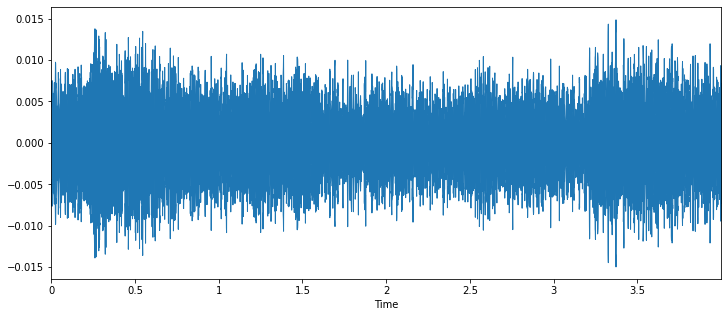

In [18]:
x, sr = librosa.load(audio_path)


plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

Number of crosses: 17


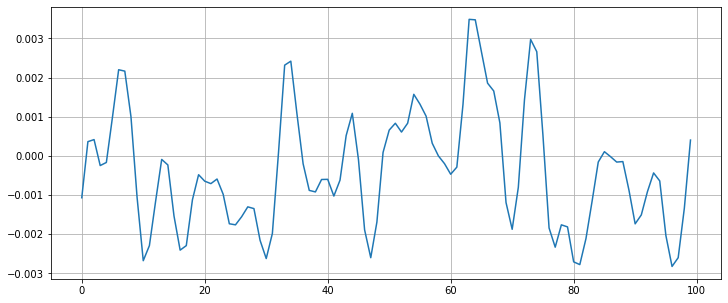

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(x[1000:1100])
plt.grid()

n_crossings = librosa.zero_crossings(x[1000:1100], pad=False)
print(f'Number of crosses: {sum(n_crossings)}')

In [20]:
centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (173,)
First 3 centroids: [1911.49105972 1890.29461188 1993.94520188]


In [46]:
len(centroids)

173

MFFCs shape: (20, 173)
First mffcs: [-435.07104 -429.31885 -436.15143 -435.02664 -429.43625]


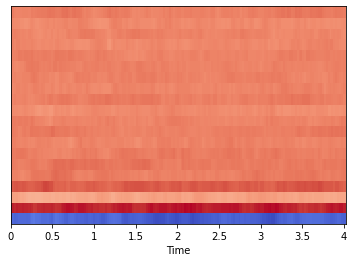

In [21]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

# We can even display an spectogram of the mfccs.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In [44]:
mfccs

array([[-4.35071045e+02, -4.29318848e+02, -4.36151428e+02, ...,
        -4.30798828e+02, -4.39397644e+02, -4.41464569e+02],
       [ 9.98375854e+01,  1.04152664e+02,  1.01635864e+02, ...,
         1.12904709e+02,  1.11417305e+02,  1.06317291e+02],
       [-3.04849472e+01, -3.45666122e+01, -3.81847725e+01, ...,
        -4.58337250e+01, -4.73581848e+01, -4.59627457e+01],
       ...,
       [ 7.95690775e+00,  7.24107504e+00,  8.39026833e+00, ...,
         1.47710502e-01, -7.29334831e+00, -9.34402847e+00],
       [-1.39161921e+00, -2.56582451e+00, -6.48050499e+00, ...,
        -1.20642109e+01, -1.02440577e+01, -8.38892555e+00],
       [ 1.24361401e+01,  1.06249943e+01,  4.73632050e+00, ...,
         1.51190701e+01,  1.28221512e+01,  1.13134212e+01]], dtype=float32)

In [35]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "input/urbansound8k/train/Train/"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv('train.csv')
    return get_audios(), df['Class'].values

In [47]:
%pwd

'C:\\Users\\chldb\\Documents\\LetUsSpeak'

In [58]:
# 시험용 - 파일이 한개일 때 (실제 데이터는 약 6984개)
x, sr = sf.read(r'C:\Users\chldb\Documents\LetUsSpeak\input\urbansound8k\train\Train\2.wav', always_2d=True)
x = parse_audio(x)
print(librosa.feature.mfcc(x).shape)
for feature in librosa.feature.mfcc(x):
    print(np.mean(feature))

(20, 345)
-422.403465760123
164.73030972112468
-54.628093889229234
34.947982581220586
-12.9650653580645
38.75521022073247
-13.084188418905885
7.385773780946748
14.93782223676293
-13.978868237824186
7.00234962670506
-2.096706547292194
10.882590017409163
-6.725752764305884
2.742610878152035
7.054492494444302
-5.520007776134758
3.658298394906875
-1.3968218778900532
2.1044192872779415


In [39]:
X, Y = get_samples()

# Since the data manufacturer doesn't provide the labels for the test audios,
# we will have do the split for the labeled data.
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [62]:
print(X[10:20], Y[10:20])  # 범위는 확인용으로 임의로 설정
print(X.shape, Y.shape)

[[-1.45059381e+02  1.06063771e+02 -3.35219546e+01  3.12998920e+01
  -2.04559641e+01  2.59868537e+01  1.14683281e+01 -5.56124419e+00
  -1.14459196e+01 -2.12272763e-01 -3.13921645e+00 -3.07584761e+00
  -1.90334527e+00 -9.03807349e+00 -4.87109001e+00 -7.12489148e+00
  -3.00011717e+00 -2.67650356e+00  1.24963129e-01 -4.78668989e+00]
 [-3.18734895e+02  1.56438323e+02 -3.11073706e+01 -3.34284546e+01
  -2.54218480e+01  1.99780145e+00  1.88168588e+00 -1.05377482e+01
  -2.41437731e+00 -4.37166998e+00 -1.49829167e+00 -5.04680991e+00
  -6.47419314e+00 -3.04352513e+00 -2.64616587e+00 -1.21859438e+00
  -3.04509568e+00 -1.09982449e-01  5.68539194e+00  9.82022864e+00]
 [-3.46028913e+02  1.52582123e+02 -2.08486253e+01 -4.39583290e+01
  -2.64795092e+01  1.36924668e+00  4.51573574e+00 -8.66625723e+00
  -3.30225457e+00 -3.30669169e+00 -5.59011096e+00 -5.66765389e+00
  -5.47935307e+00 -4.80300628e+00 -4.22870382e+00 -2.05515511e+00
  -9.54342632e-01  1.96912408e+00  4.74989086e+00  8.38487599e+00]
 [-3.44

In [40]:
print(f'Shape: {x_train.shape}')
print(f'Observation: \n{x_train[0]}')
print(f'Labels: {y_train[:5]}')

Shape: (5238, 20)
Observation: 
[-3.13758229e+02  1.74068742e+02  1.08526923e+01  5.58145286e+00
  1.13323080e+01  1.67148755e+01  7.17773870e-01  6.42244853e+00
  5.24013307e+00  5.23558332e+00 -1.56680990e+00 -4.05294665e+00
 -1.81793225e+00  6.12917142e+00 -2.46886970e+00 -3.33721363e+00
  4.44524177e+00  4.01397429e+00  3.11850856e-01  1.26509259e+00]
Labels: [2 5 7 3 9]


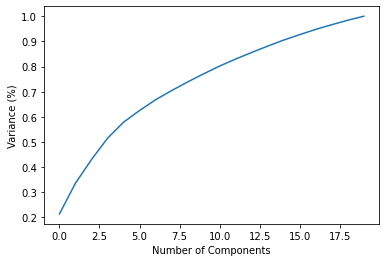

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA().fit(x_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

In [42]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

In [43]:
print(f'Model Score: {model.score(x_test_scaled, y_test)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.9117983963344788
Confusion Matrix: 
[[216   4   4   2   0   2   1   0   2   5]
 [  0  59   0   1   3   0   0   0   1   1]
 [  5   6 166  14   3   2   3   0   2   6]
 [  0   3   1 150   0   0   3   0   0   1]
 [  0   1   0   0 196   1   0   5   1   0]
 [  1   1   2   4   1 207   0   0   0   2]
 [  0   4   3  13   0   0  67   1   1   2]
 [  0   3   0   0   4   0   0 201   0   4]
 [  0   2   1   2   0   1   0   0 181   0]
 [  9   3   2   4   1   0   0   0   0 149]]
